## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn
import yfinance as yf

## Import data

In [ ]:
df = yf.Ticker('HG=F').history('10y')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-12-12 00:00:00-05:00,3.329,3.3420,3.3220,3.332,419,0.0,0.0
2013-12-13 00:00:00-05:00,3.330,3.3570,3.3185,3.352,581,0.0,0.0
2013-12-16 00:00:00-05:00,3.360,3.3770,3.3555,3.376,506,0.0,0.0
2013-12-17 00:00:00-05:00,3.365,3.3785,3.3600,3.367,533,0.0,0.0
2013-12-18 00:00:00-05:00,3.355,3.3710,3.3500,3.361,646,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2013-12-12 00:00:00-05:00 to 2023-12-12 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.0,2515.0
mean,3.115163,3.135520,3.093963,3.115966,1673.676740,0.0,0.0
std,0.697853,0.704051,0.691808,0.698644,6711.640825,0.0,0.0
min,1.936500,1.962500,1.936500,1.939500,0.000000,0.0,0.0
25%,2.622000,2.641250,2.603500,2.622250,330.000000,0.0,0.0
50%,2.970000,2.993000,2.953000,2.975500,475.000000,0.0,0.0
75%,3.620000,3.638500,3.605000,3.628000,710.500000,0.0,0.0
max,4.910000,5.010000,4.791000,4.929000,79408.000000,0.0,0.0


## Data Investigation

In [ ]:
print(df['Dividends'].value_counts())
print(df['Stock Splits'].value_counts())

0.0    2515
Name: Dividends, dtype: int64
0.0    2515
Name: Stock Splits, dtype: int64


as shown above, both columns only contains zeros so it's better to be dropped as they don't have any significant effect.

In [ ]:
df.drop(['Dividends','Stock Splits'],axis=1,inplace=True)

let's see the correlations between columns

<Axes: >

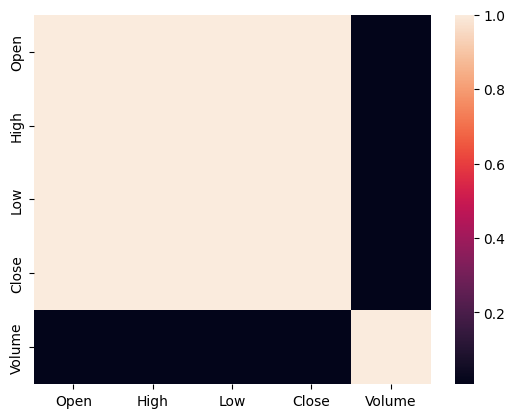

In [ ]:
sns.heatmap(df.corr())

As shown in the above figure, Volume column doesn't have any correlation with any column. On the other hand, Open , High , Low and Close columns are highly correlated.

Now, Let's check their distributions.

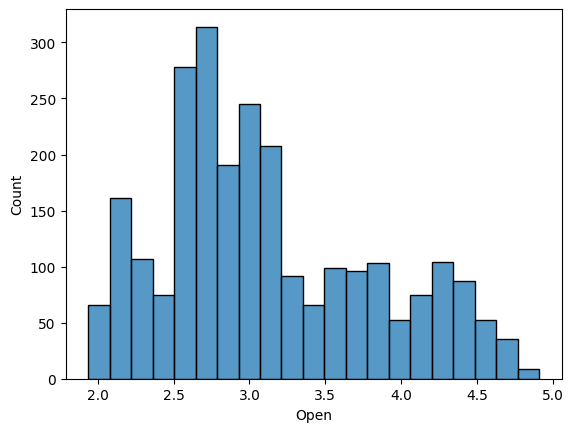

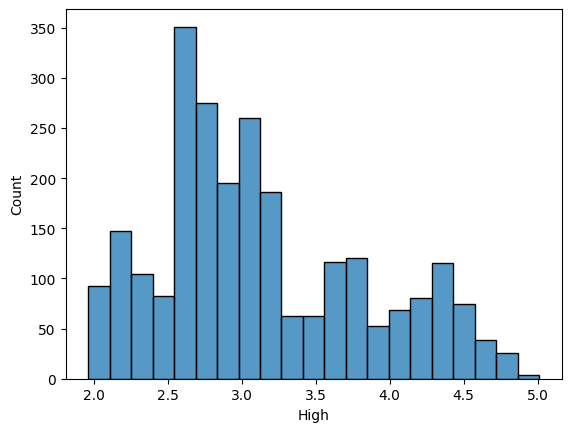

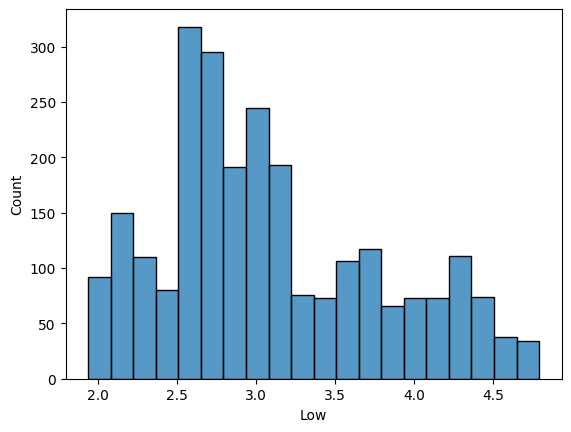

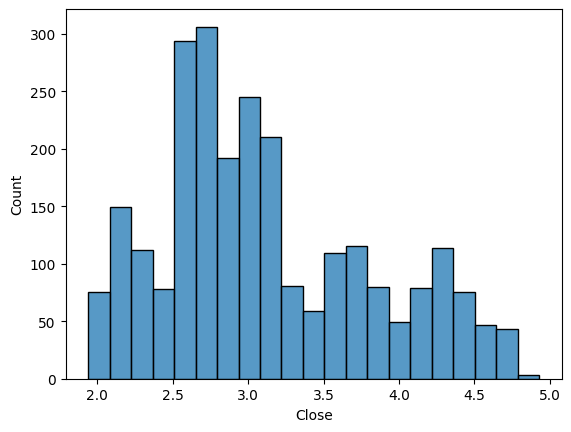

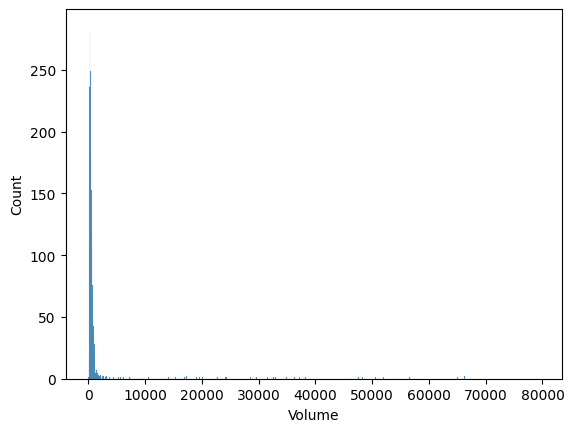

In [ ]:
for col in df.columns:
  sns.histplot(df[col])
  plt.show()

Another problem with column volume that is contains large amount of outliers. So it's better to also drop this column.

Checking null values

In [ ]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

All looks good!

We'll choose date , open and close columns to work with.

In [ ]:
df = df[['Open','Close']]
df.head()

,Open,Close
Date,,
2013-12-12 00:00:00-05:00,3.329,3.332
2013-12-13 00:00:00-05:00,3.330,3.352
2013-12-16 00:00:00-05:00,3.360,3.376
2013-12-17 00:00:00-05:00,3.365,3.367
2013-12-18 00:00:00-05:00,3.355,3.361


In [ ]:
# df.index = df.index.strftime('%Y-%m-%d')

In [ ]:
dates =pd.DataFrame(df.index)

In [ ]:
dates

,Date
0,2013-12-12 00:00:00-05:00
1,2013-12-13 00:00:00-05:00
2,2013-12-16 00:00:00-05:00
3,2013-12-17 00:00:00-05:00
4,2013-12-18 00:00:00-05:00
...,...
2510,2023-12-06 00:00:00-05:00
2511,2023-12-07 00:00:00-05:00
2512,2023-12-08 00:00:00-05:00
2513,2023-12-11 00:00:00-05:00


In [ ]:
df['Close']

Date
2013-12-12 00:00:00-05:00    3.3320
2013-12-13 00:00:00-05:00    3.3520
2013-12-16 00:00:00-05:00    3.3760
2013-12-17 00:00:00-05:00    3.3670
2013-12-18 00:00:00-05:00    3.3610
                              ...  
2023-12-06 00:00:00-05:00    3.7165
2023-12-07 00:00:00-05:00    3.7845
2023-12-08 00:00:00-05:00    3.8200
2023-12-11 00:00:00-05:00    3.7800
2023-12-12 00:00:00-05:00    3.7965
Name: Close, Length: 2515, dtype: float64

In [ ]:
df.head()

,Open,Close
Date,,
2013-12-12 00:00:00-05:00,3.329,3.332
2013-12-13 00:00:00-05:00,3.330,3.352
2013-12-16 00:00:00-05:00,3.360,3.376
2013-12-17 00:00:00-05:00,3.365,3.367
2013-12-18 00:00:00-05:00,3.355,3.361


Ploting our closing and opening columns.

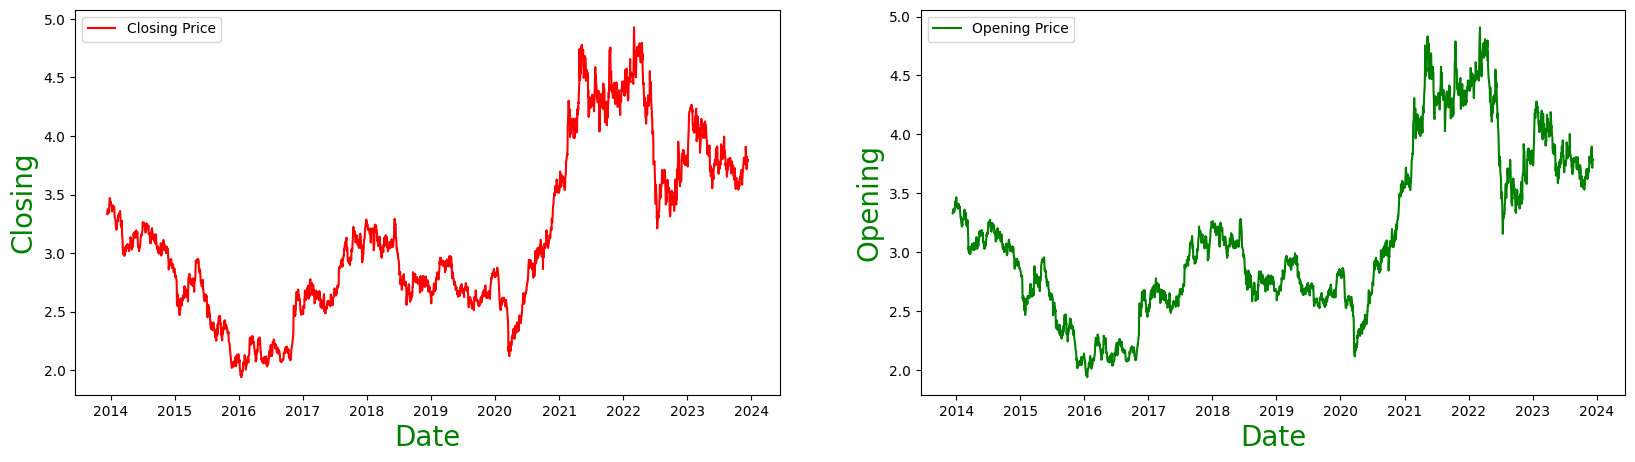

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(dates, df['Close'],'r',label='Closing Price')
plt.legend()
plt.xlabel('Date',fontsize=20 , color='g')
plt.ylabel('Closing',fontsize=20 , color='g')
plt.subplot(1,2,2)
plt.plot(dates, df['Open'],'g', label='Opening Price')
plt.legend()
plt.xlabel('Date',fontsize=20 , color='g')
plt.ylabel('Opening',fontsize=20 , color='g')
plt.show()

## Data Scaling

In [ ]:
scaled_df = df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMs = MinMaxScaler()
scaled_df[scaled_df.columns] = MMs.fit_transform(df[df.columns])
train_size = round(len(df)*0.80)
train_data = scaled_df.iloc[:train_size]
test_data = scaled_df.iloc[train_size:]

In [ ]:
test_data

,Open,Close
Date,,
2021-12-14 00:00:00-05:00,0.784765,0.774210
2021-12-15 00:00:00-05:00,0.781403,0.749289
2021-12-16 00:00:00-05:00,0.778376,0.789764
2021-12-17 00:00:00-05:00,0.796032,0.786586
2021-12-20 00:00:00-05:00,0.784597,0.785583
...,...,...
2023-12-06 00:00:00-05:00,0.617622,0.594414
2023-12-07 00:00:00-05:00,0.598453,0.617160
2023-12-08 00:00:00-05:00,0.621994,0.629035


## Preparing Dataset

For every row in our data, we will lookback 50 rows of the previous closing and opening data. create_sequence function with take our dataframe lets say of length 1000. It will start from row of index 50 and place the previous 50 rows prices in this row. This function will return two np.arrays. The first one will have 100 columns where 50 columns is the previous closing prices and 50 columns of opening prices and will return output np.array which will contains the closing and opening outputs of this 100 columns.

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_dates = dates.iloc[50:train_size]
test_dates = dates.iloc[50+train_size:]

In [ ]:
len(train_dates),len(test_dates)

(1962, 503)

In [ ]:
train_seq.shape , test_seq.shape , train_label.shape , test_label.shape

((1962, 50, 2), (453, 50, 2), (1962, 2), (453, 2))

## LSTM Model

In [ ]:
from keras import Sequential
from keras.layers import Dense , Dropout, LSTM , Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True ,input_shape=train_seq.shape[1:]))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])
model.summary( )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_seq.shape[:2]

(1962, 50)

In [ ]:
train_label.dtype

dtype('float64')

In [ ]:
model.fit(train_seq, train_label , epochs=80,verbose=1)

Epoch 1/80
62/62 [==============================] - 10s 67ms/step - loss: 0.0113 - mean_absolute_error: 0.0615
Epoch 2/80
62/62 [==============================] - 3s 51ms/step - loss: 0.0011 - mean_absolute_error: 0.0247
Epoch 3/80
62/62 [==============================] - 3s 51ms/step - loss: 0.0011 - mean_absolute_error: 0.0240
Epoch 4/80
62/62 [==============================] - 4s 62ms/step - loss: 0.0010 - mean_absolute_error: 0.0236
Epoch 5/80
62/62 [==============================] - 4s 72ms/step - loss: 9.2202e-04 - mean_absolute_error: 0.0225
Epoch 6/80
62/62 [==============================] - 3s 51ms/step - loss: 8.9932e-04 - mean_absolute_error: 0.0222
Epoch 7/80
62/62 [==============================] - 3s 51ms/step - loss: 9.0542e-04 - mean_absolute_error: 0.0222
Epoch 8/80
62/62 [==============================] - 6s 102ms/step - loss: 8.3613e-04 - mean_absolute_error: 0.0214
Epoch 9/80
62/62 [==============================] - 4s 57ms/step - loss: 7.3602e-04 - mean_absolute_er

predict test data

In [ ]:
predicted_y = model.predict(test_seq)

15/15 [==============================] - 1s 15ms/step


In [ ]:
predicted_y.shape , test_label.shape

((453, 2), (453, 2))

In [ ]:
predicted_y_inverse = MMs.inverse_transform(predicted_y)
test_label_inverse = MMs.inverse_transform(test_label)

In [ ]:
test_label_inverse.shape,predicted_y.shape

((453, 2), (453, 2))

In [ ]:
len(test_dates)

503

In [ ]:
predicted_y_inverse = pd.DataFrame(predicted_y_inverse , columns=['Predicted Open','Predicted Close'], index=test_dates['Date'])
test_y_inverse = pd.DataFrame(test_label_inverse , columns=['Open','Close'], index=test_dates['Date'])

In [ ]:
predicted_y_inverse.shape , test_y_inverse.shape

((453, 2), (453, 2))

In [ ]:
result = pd.concat([test_y_inverse,predicted_y_inverse],axis=1)
result

,Open,Close,Predicted Open,Predicted Close
Date,,,,
2022-02-25 00:00:00-05:00,4.5000,4.4720,4.482980,4.478501
2022-02-28 00:00:00-05:00,4.4560,4.4445,4.513632,4.508055
2022-03-01 00:00:00-05:00,4.4965,4.5865,4.463865,4.459845
2022-03-02 00:00:00-05:00,4.5630,4.6555,4.629957,4.619641
2022-03-03 00:00:00-05:00,4.7000,4.7715,4.656270,4.642938
...,...,...,...,...
2023-12-06 00:00:00-05:00,3.7730,3.7165,3.799115,3.794733
2023-12-07 00:00:00-05:00,3.7160,3.7845,3.750993,3.748614
2023-12-08 00:00:00-05:00,3.7860,3.8200,3.806856,3.802428


### Visualizing predictions

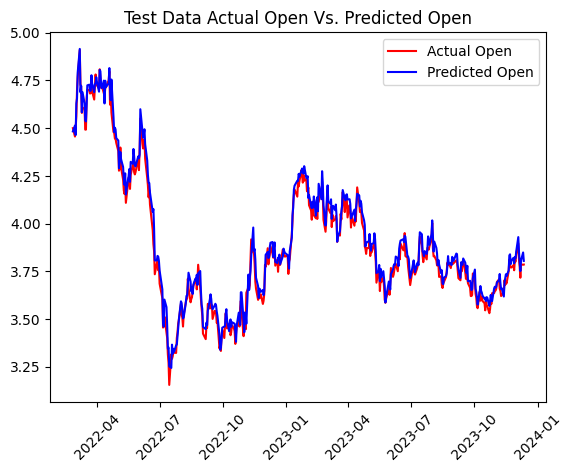

In [ ]:
plt.plot(result.index , result['Open'], 'r',label='Actual Open')
plt.plot(result.index , result['Predicted Open'],'b',label='Predicted Open')
plt.legend()
plt.title('Test Data Actual Open Vs. Predicted Open')
plt.xticks(rotation=45)
plt.show()

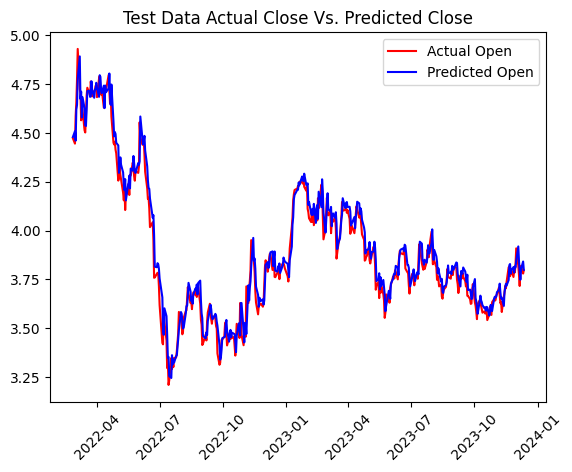

In [ ]:
plt.plot(result.index , result['Close'], 'r',label='Actual Open')
plt.plot(result.index , result['Predicted Close'],'b',label='Predicted Open')
plt.legend()
plt.title('Test Data Actual Close Vs. Predicted Close')
plt.xticks(rotation=45)
plt.show()

## Scoring metrics

In [ ]:
def mean_absolute_percentage_error(y_test,y_predict):
  return np.mean(np.abs((y_test-y_predict)/y_test)) *100

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Test Open scores

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(result['Open'], result['Predicted Open']))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(result['Open'], result['Predicted Open'])))
print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(result['Open'], result['Predicted Open']))

Test Mean Absolute Error: 0.0391434907386898
Test Root Mean Squared Error: 0.047899803857552166
Test Mean Absolute percentage Error: 1.0164408600729398


### Test Close scores

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(result['Close'], result['Predicted Close']))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(result['Close'], result['Predicted Close'])))
print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(result['Close'], result['Predicted Close']))

Test Mean Absolute Error: 0.05083359366747455
Test Root Mean Squared Error: 0.06588371899231167
Test Mean Absolute percentage Error: 1.3146941707827564
